In [26]:
import utlis.load_patchs
import utlis.models_training_testing
import utlis.plotting
import importlib
import os
import copy 
# Reload the modules after changes
importlib.reload(utlis.load_patchs)
importlib.reload(utlis.models_training_testing)
importlib.reload(utlis.plotting)

# Then use the wildcard import to bring in the functions
from utlis.load_patchs import *
from utlis.models_training_testing import *
from utlis.plotting import *


In [9]:
classes={0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [34]:
for i in classes:
    print(f"{i}-{classes[i]}.")

0-airplane.
1-automobile.
2-bird.
3-cat.
4-deer.
5-dog.
6-frog.
7-horse.
8-ship.
9-truck.


In [10]:
# load datasets as patchs
train_dataset=read_image_labels("data/images/train.txt", 32, [32, 32])
val_dataset=read_image_labels("data/images/val.txt", 32, [32, 32])
test_dataset=read_image_labels("data/images/test.txt", 32, [32, 32])
# train_for_model_slection=read_image_labels("data/images/train_f_model_selction.txt", 32, [32, 32])

In [ ]:
one_patch = next(iter(train_dataset))  # Get the first batch
images_patch, labels_patch = one_patch  # Unpack the images and labels
image_shape=images_patch[0].shape
print("image shape:",image_shape)


In [1]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [ ]:
#show sample of data 
show_images(images_patch, labels_patch)

# choose the model

In [ ]:
#load_models
models_list = [
    model_1(),
    model_2(image_shape=image_shape)  ]
print("*"*90)
for i in models_list:
  print("*"*90)
  print(i.summary())
  print("*"*90)
print("*"*90)

In [ ]:
image_shape

In [ ]:
#choose the best model 
epochs=10
model_performance, best_model_name=train_and_evaluate_models(models_list, val_dataset, test_dataset, epochs, 32, False) 

In [ ]:
#train the best model
epochs=100
model, history=train_and_evaluate_models( [models_list[int(best_model_name.split("_")[2])-1]], train_dataset, val_dataset,epochs, 32, True)

In [ ]:
#plot the error  
plot_accuracy(epochs, history, string="Validation")

In [ ]:
acc,f1=predict(model, test_dataset)
print("the model accuracy is :",acc)
print("the model f1 score is :",f1)

### check_point

In [ ]:
try:
    os.makedirs("models")
    
except OSError:
    print("Creation of the directory %s failed" % os.path.abspath("models"))
model.save(f"models/{best_model_name}.h5")
model.save(f"models/{best_model_name}.keras")


# load model 

In [ ]:
# Load the Keras model from the .h5 file
model_path = 'models/build_model_1.h5'  # Path to your Keras model
model = tf.keras.models.load_model(model_path)

# Print the model summary
model.summary()


In [ ]:
# Assume 'model' is your existing model
deep_copied_model = copy.deepcopy(model)
epochs=10
deep_copied_model, history=train_and_evaluate_models([deep_copied_model], train_dataset, val_dataset, epochs, 32, True,l_r=.001,mome=0.0)

In [ ]:
acc,f1=predict(deep_copied_model, test_dataset)
print(f"the model accuracy is :{acc:.3f}")
print(f"the model f1 score is :{f1:.3f}")

In [ ]:
plot_accuracy(epochs, history, string="Validation")

## check point 2 

In [ ]:
deep_copied_model.save(f"models/build_model_1_v2.h5")
deep_copied_model.save(f"models/build_model_1_v2.keras")

###  load model 2

In [17]:
import tensorflow as tf 
model_v3 = tf.keras.models.load_model('models/build_model_1_v2.h5')
acc,f1, y_predict_softmax,y_test=predict(model_v3, test_dataset)
_,_, y_train_predict,y_train=predict(model_v3, train_dataset)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step


D:\1-brain_insipred\cv\cifar\utlis\plotting.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontweight='bold')


the folder is founded
images/combined_combined_heat_map.pdf


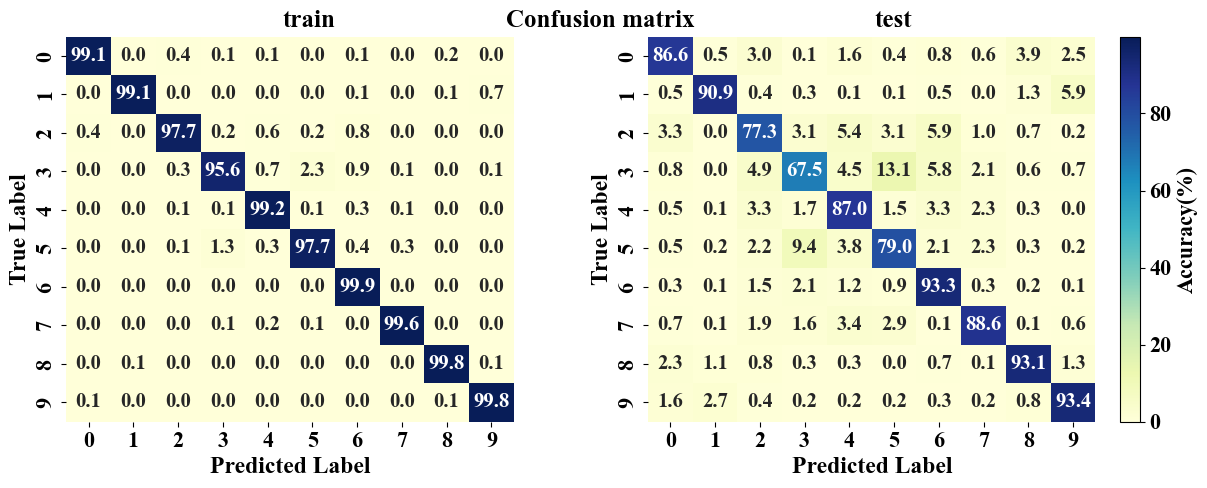

In [27]:
plot_combined_confusion_heat_map(y_train, y_train_predict, y_test, y_predict_softmax, "combined")    

In [19]:
from sklearn.metrics import classification_report
print("Accuracy:",acc)
print("F1_score:", f1)
print("Classification Report:\n", classification_report(y_test, y_predict_softmax))

Accuracy: 0.8567
F1_score: 0.855692620830258
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1000
           1       0.95      0.91      0.93      1000
           2       0.81      0.77      0.79      1000
           3       0.78      0.68      0.72      1000
           4       0.81      0.87      0.84      1000
           5       0.78      0.79      0.79      1000
           6       0.83      0.93      0.88      1000
           7       0.91      0.89      0.90      1000
           8       0.92      0.93      0.92      1000
           9       0.89      0.93      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [8]:
print(f"the model accuracy is :{acc*100:.2f}%")
print(f"the model f1 score is :{f1*100:.2f}%")

the model accuracy is :85.67%
the model f1 score is :85.57%
